In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [ ]:
import pandas       # reading the dataset
import numpy as np  # operating the data

import matplotlib.pyplot as plt # visualization
import seaborn as sns ; sns.set() # visualization
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
df= pandas.read_csv('train.csv')
print(df)
df.head()


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dft= pandas.read_csv('test.csv')
print(dft)
df.head()

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***Read & Visualize***

In [ ]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns; sns.set()        # visualization
# this 'check_df' function is helps the preprocess the reason that I use the  method is easier way to analysis.

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pandas.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
# encoding helps to find categorical variables in this data


def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.

    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
check_df(df)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jac

<ipython-input-54-67cf0f1ba2fd>:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [ ]:
print ('Train set:', df.shape)
print('Train columns :', list(df.columns.values))
print ('Test set:', dft.shape)
print('Test columns :', list(dft.columns.values))

Train set: (891, 12)
Train columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test set: (418, 11)
Test columns : ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
print('Train set\n',df.isnull().sum())
print('_'*30)
print('Test set\n',dft.isnull().sum())

Train set
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
______________________________
Test set
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Train set : The Age, Cabin and Embarked have null values
Test set : The Age, Cabin and Fare have null values

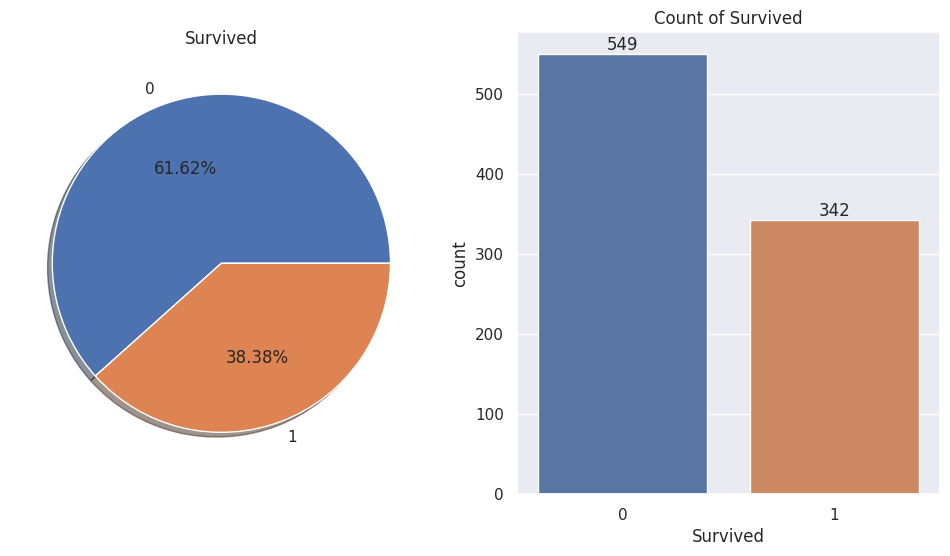

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data = df ,x ='Survived' ,ax=ax[1])
ax[1].set_title('Count of Survived')
for label in ax[1].containers:
    ax[1].bar_label(label)
plt.show()

# ***Feature Analysis***

In [ ]:
df = pandas.read_csv('train.csv')
encoding_map = {'species': {'setosa': 0, 'versicolor': 1, 'virginica': 2}}
df.replace(encoding_map, inplace=True)

<ipython-input-254-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

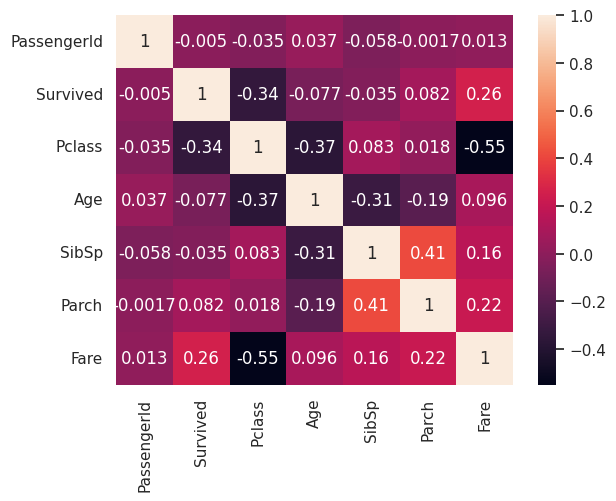

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
print(df.groupby(['Sex','Survived'])['Survived'].count())
print('-'*30)
print(df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908


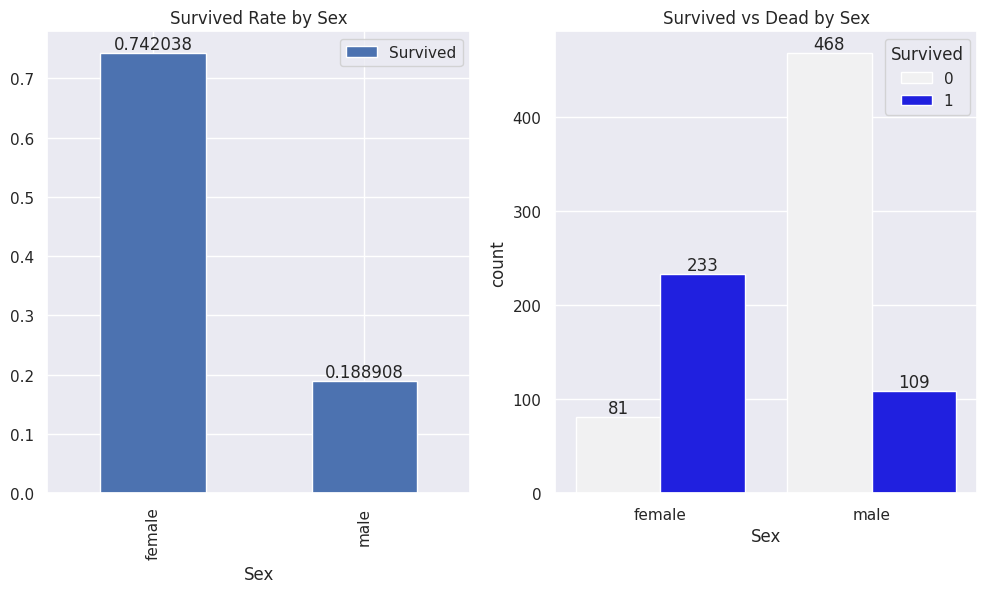

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived Rate by Sex')
for label in ax[0].containers:
    ax[0].bar_label(label)

sns.countplot(x = 'Sex',hue='Survived',data=df,ax=ax[1],order=df['Sex'].value_counts(ascending=True).index, color = 'blue')
ax[1].set_title('Survived vs Dead by Sex')
for label in ax[1].containers:
    ax[1].bar_label(label)
plt.show()

In [ ]:
cat_cols, num_cols, cat_but_cat=grab_col_names(df)

Observations: 891
Variables: 4
cat_cols: 4
num_cols: 0
cat_but_car: 0
num_but_cat: 2


In [ ]:
df= pandas.read_csv('train.csv')
print(df)
df.head()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
#df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [ ]:
cat_cols = ['Sex','Embarked']

In [ ]:
df = one_hot_encoder(df, cat_cols, drop_first=True)
df

,PassengerId,Survived,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,1
1,2,1,1,38.0,0,0,0
2,3,1,3,26.0,0,0,1
3,4,1,1,35.0,0,0,1
4,5,0,3,35.0,1,0,1
...,...,...,...,...,...,...,...
886,887,0,2,27.0,1,0,1
887,888,1,1,19.0,0,0,1
888,889,0,3,28.0,0,0,1
889,890,1,1,26.0,1,0,0


# ***Models***

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X=df.drop(["Sex_male"],axis=1)
y=df["Sex_male"]
# the aim is which is liked to find that

In [ ]:
#this part helps to choose the which classification is the better for this data
# using different classification method which is the give best result for that
from sklearn.model_selection import cross_validate
models=[("RF",RandomForestClassifier()),
      ( "GB",GradientBoostingClassifier()),
       ("DT",DecisionTreeClassifier()),
      ( "LG",LogisticRegression()),
      ( "KNC",KNeighborsClassifier()),
       ("LGBM",LGBMClassifier()),
       ("XGB",XGBClassifier())]
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=100, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier().fit(X_train,y_train.values.ravel())
# that creates an example and trains the model on the training dataset (X_train and y_train).

In [ ]:
from sklearn.metrics import  accuracy_score
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7821229050279329

In [ ]:
#It is used to evaluate the results of the optimized model, which measures its hyperparameters and using cross-evaluation.

from sklearn.model_selection import GridSearchCV

rf_model=RandomForestClassifier(random_state=17)
rf_params={"max_depth":[5,8,None],
           "max_features":[3,5,7,"auto"],
           "min_samples_split":[2,5,8,15,20],
           "n_estimators":[100,200,500]}

rf_best_grd=GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)
print(rf_best_grd.best_params_)

rf_final=rf_model.set_params(**rf_best_grd.best_params_,random_state=17).fit(X,y)
cv_results=cross_validate(rf_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

print(cv_results["test_accuracy"].mean())

print(cv_results["test_f1"].mean())

print(cv_results["test_roc_auc"].mean())


Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
<ipython-input-273-ca3319809fd3>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_final=rf_model.set_params(**rf_best_grd.best_params_,random_state=17).fit(X,y)


{'max_depth': 5, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.786730274307953
0.7107184784476867
0.7765979990035705


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# ***Random Forest Classifier***

In [ ]:
df= pandas.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pandas.get_dummies(df[features])
X_test = pandas.get_dummies(dft[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pandas.DataFrame({'PassengerId': dft.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# ***Result***

In [ ]:
df= pandas.read_csv('submission.csv')
print(df)
df.head()

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

X_test

No. of training examples: 712
No. of testing examples: 179


,PassengerId,Survived,Pclass,Age,Embarked_Q,Embarked_S
709,710,1,3,28.0,0,0
439,440,0,2,31.0,0,1
840,841,0,3,20.0,0,1
720,721,1,2,6.0,0,1
39,40,1,3,14.0,0,0
...,...,...,...,...,...,...
433,434,0,3,17.0,0,1
773,774,0,3,28.0,0,0
25,26,1,3,38.0,0,1
84,85,1,2,17.0,0,1


# ***Regression***

In [ ]:
df= pandas.read_csv('train.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
encoding_map= {'Sex': {'male': 0,'female': 1}
               }

In [ ]:
df.replace(encoding_map,inplace=True)#replace the labes

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X=df[[ 'Survived']]
y=df[['Sex']]

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.intercept_
#B0 katsayısını çağırmak için

array([0.14754098])

In [ ]:
model.coef_
#B1 katsayısını çağırmak için

array([[0.53374557]])

In [ ]:
model.score(X,y)

0.2952307228626888

# ***Regression graph***

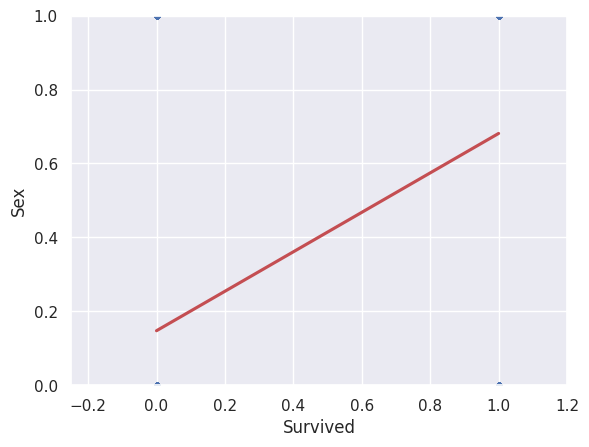

In [ ]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_ylabel("Sex")
g.set_xlabel("Survived")
plt.xlim(-0.25,1.20)
plt.ylim(0,1)
plt.show()

# ***testing part***

In [ ]:
model.intercept_+model.coef_*165

array([[88.21555939]])

In [ ]:
model.predict([[165]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[88.21555939]])